In [2]:
using Plots
function old_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in Plots.getpctrange(n)]
end

old_pick_colors (generic function with 1 method)

In [3]:
# without specifying the background color, you get colors that are hard to see
cols = distinguishable_colors(20)[2:end]

In [4]:
# ugly, plus many similar, but at least you can see them
cols = distinguishable_colors(20,colorant"white")[2:end]

In [5]:
# this is the default gradient used as the base for color picking now
rainbow = colorscheme(:darkrainbow)
RGB[getColorZ(rainbow,z) for z in linspace(0,1,100)]

In [54]:
# try out a new gradient
new_colorgradient = colorscheme([colorant"darkblue", colorant"blueviolet",  colorant"darkcyan",colorant"green",
    Plots.darken(colorant"yellow",0.3), colorant"orange", Plots.darken(colorant"red",0.2)])
        #[0, 0.15, 0.3, 0.45, 0.7, 1.0]) # add z-values for each color to make gradient non-linear
RGB[getColorZ(new_colorgradient,z) for z in linspace(0,1,100)]

In [55]:
# a different method to choose from the gradient
function new_get_zvalues(n::Int)
    offsets = Plots.getpctrange(ceil(Int,n/4)+1)/4
    offsets = vcat(offsets[1], offsets[3:end])
    zvalues = Float64[]
    for offset in offsets
        append!(zvalues, offset + [0.0, 0.5, 0.25, 0.75])
    end
    vcat(zvalues[1], 1.0, zvalues[2:n-1])
end

# and a method to display the colors we will choose
function new_pick_colors(grad,n)
    grad=colorscheme(grad)
    RGB[getColorZ(grad,z) for z in new_get_zvalues(n)]
end

new_pick_colors (generic function with 1 method)

In [56]:
# old gradient with old color picker
# better (IMO) than the distinguishable_colors... first 5 colors are good, but then it gets worse
# NOTE: this is the current default palette
old_pick_colors(:darkrainbow,19)

In [57]:
# new gradient with old color picker... darker, with less blue
old_pick_colors(new_colorgradient, 19)

In [58]:
# old gradient with new color picker... colors are the same but ordering is different
new_pick_colors(rainbow, 19)

In [59]:
# new gradient with new color picker
new_pick_colors(new_colorgradient, 19)

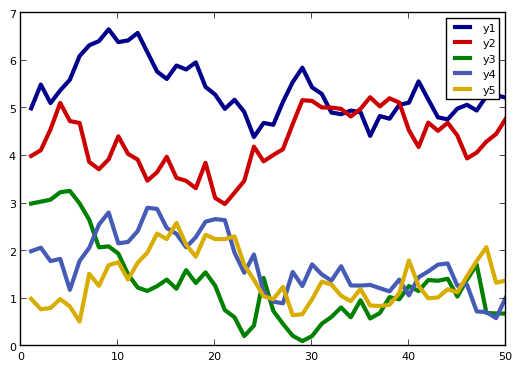

In [60]:
# plot a few colors (it's important that these look ok)
pyplot()
default(size=(600,400))
plot(Plots.fakedata(50,5)/3 .+ reverse(1:5)', l=(3, new_pick_colors(new_colorgradient, 19)'))

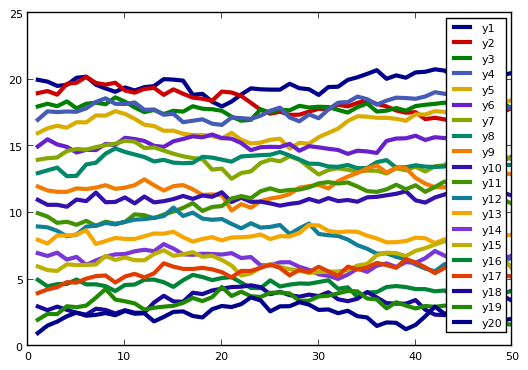

In [61]:
# plot many colors (no hue should dominate your attention)
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, new_pick_colors(new_colorgradient, 19)'))

In [62]:
# notice that we have unlimited unique colors this way
colors = new_pick_colors(new_colorgradient, 1000)
length(unique(colors))

1000

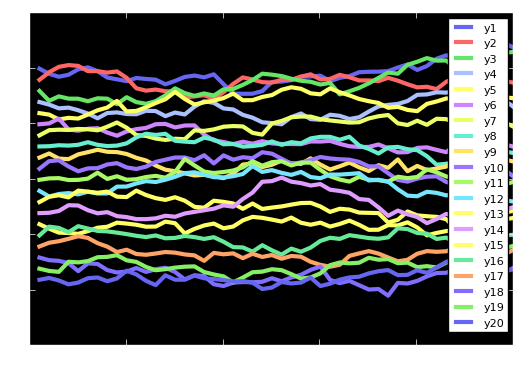

In [64]:
# here's how we might adjust for a dark background
lightcolors = map(c->Plots.lighten(c,0.4), new_pick_colors(new_colorgradient, 19)')
plot(Plots.fakedata(50,20)/3 .+ reverse(1:20)', l=(3, lightcolors), bg=:black)

In [66]:
# and could consider other palettes for backgrounds with a certain hue, for example orange background:
orangebg_colorgradient = colorscheme([colorant"darkblue", colorant"blueviolet",  colorant"darkcyan",colorant"green"])
RGB[getColorZ(orangebg_colorgradient,z) for z in linspace(0,1,100)]

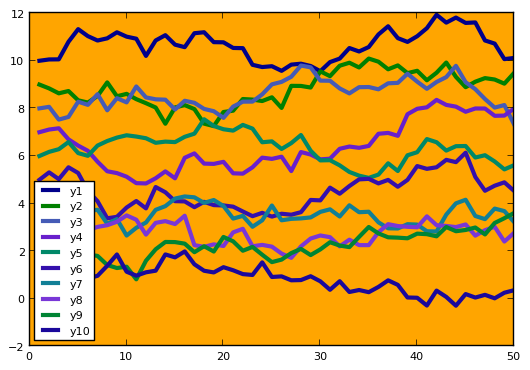

In [69]:
plot(Plots.fakedata(50,10)/3 .+ reverse(1:10)', l=(3, new_pick_colors(orangebg_colorgradient,20)'), bg=:orange)